## Evaluation Metrics
---

### Top-1 Accuracy
This is the standard classification metric. Within the domain of age prediction this would be useful but too strict for age since near misses are penalized the same as for far misses.

### Mean Absolute Error (MAE)
We will treat class index as continuous age, this would be more meaningful than just accuracy.

### Mean Square Error (MSE) 
Similar to MAE but this will also penalize large errors more heavily. This would be good considering we would want our model to predict close to the real age and far off age should be penalized.

### Cumulative Score (CS-k)
This is a metric that is widely used in the age estimation research. This will measure the percentage of predictions withing k years of the true age. We can use k value of 5 or 10 which would be "Our model gets 90% of ages within +-5 or +-10 years."

## Evaluation of DeepFace age prediction for our data.
---


In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt

In [2]:

base_path = "D://braineye"
# Define the path to the dataset.
dataset_path = os.path.join(base_path, "dataset")
# Define the path to save the csv file.
dataset_002_path = os.path.join(dataset_path, f"dataset_v0.0.2.csv")

df = pd.read_csv(dataset_002_path, sep=";")
#Metrics
deepface_metrics = {}

# Top 1 Accuracy of DeepFace SSD model on our data.
correct_predictions = (df['Age'] == df['DeepFace_SSD_Age']).sum()
total_predictions = df['Age'].count()
top_1_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
deepface_metrics['Top_1_Accuracy'] = top_1_accuracy
print(f"Top 1 Accuracy of DeepFace Age Prediction model: {top_1_accuracy:.2%}")

# Cumulative Score (CS) at different error levels
for error_level in [5, 10]:
    cs = (abs(df['Age'] - df['DeepFace_SSD_Age']) <= error_level).sum() / total_predictions if total_predictions > 0 else 0
    deepface_metrics[f'CS@{error_level}'] = cs
    print(f"Cumulative Score (CS) at error level {error_level}: {cs:.2%}")

# Mean Absolute Error(MAE)
mae = mean_absolute_error(df['Age'], df['DeepFace_SSD_Age'])
deepface_metrics['Mean_Absolute_Error'] = mae
print(f"Mean Absolute Error of DeepFace Age Prediction model: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(df['Age'], df['DeepFace_SSD_Age'])
deepface_metrics['Mean_Squared_Error'] = mse
print(f"Mean Squared Error of DeepFace Age Prediction model: {mse:.2f}")

Top 1 Accuracy of DeepFace Age Prediction model: 5.80%
Cumulative Score (CS) at error level 5: 55.44%
Cumulative Score (CS) at error level 10: 85.93%
Mean Absolute Error of DeepFace Age Prediction model: 5.73
Mean Squared Error of DeepFace Age Prediction model: 53.21


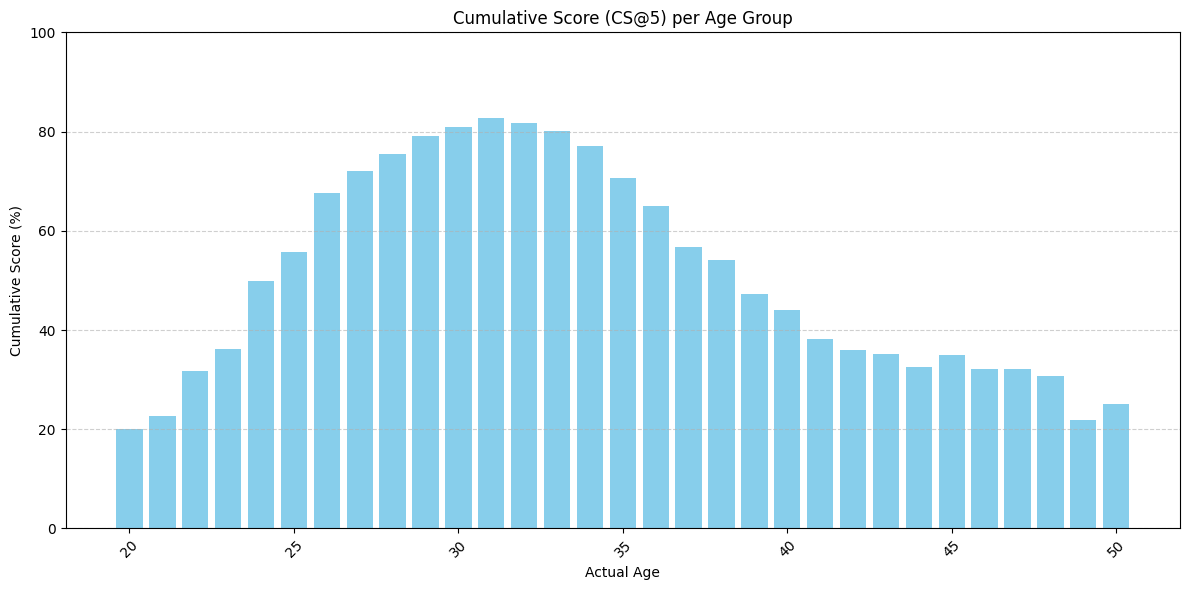

In [3]:
# Lets add one metric to check the performance using Cumulative score with 
# error level 5 for each age.
eval = df
df['error'] = abs(df['Age'] - df['DeepFace_SSD_Age'])
ages = sorted(eval['Age'].unique())

cs_by_age =[]
for age in ages:
    subset = eval[eval['Age'] == age]
    total = len(subset) 
    if total == 0:
        continue
    cs = (subset['error'] <= 5).sum() / total if total > 0 else 0
    cs_by_age.append((age, cs*100))
    # print(f"Age: {age}, Cumulative Score (CS) @ error level 5: {cs:.2f}%")

# Split into separate lists for plotting
age_list, cs_list = zip(*cs_by_age)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_list, cs_list, color='skyblue')

plt.title('Cumulative Score (CS@5) per Age Group')
plt.xlabel('Actual Age')
plt.ylabel('Cumulative Score (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Evaluation of DeepFace age prediction our test data.
---

In [7]:
# Extracting the test set and the data from the csv file.
test_set_ids = []
test_dir = os.path.join(dataset_path, "test")
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            test_set_ids.append(int(os.path.basename(file).split(".")[0]))
df_test = df[df['Id'].isin(test_set_ids)]

#Metrics
deepface_metrics = {}

# Top 1 Accuracy of DeepFace SSD model on our data.
correct_predictions = (df_test['Age'] == df_test['DeepFace_SSD_Age']).sum()
print(correct_predictions)

total_predictions = df_test['Age'].count()
top_1_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
deepface_metrics['Top_1_Accuracy'] = top_1_accuracy
print(f"Top 1 Accuracy of DeepFace Age Prediction model: {top_1_accuracy:.2%}")

# Cumulative Score (CS) at different error levels
for error_level in [5, 10]:
    cs = (abs(df_test['Age'] - df_test['DeepFace_SSD_Age']) <= error_level).sum() / total_predictions if total_predictions > 0 else 0
    deepface_metrics[f'CS@{error_level}'] = cs
    print(f"Cumulative Score (CS) at error level {error_level}: {cs:.2%}")

# Mean Absolute Error(MAE)
mae = mean_absolute_error(df_test['Age'], df_test['DeepFace_SSD_Age'])
deepface_metrics['Mean_Absolute_Error'] = mae
print(f"Mean Absolute Error of DeepFace Age Prediction model: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(df_test['Age'], df_test['DeepFace_SSD_Age'])
deepface_metrics['Mean_Squared_Error'] = mse
print(f"Mean Squared Error of DeepFace Age Prediction model: {mse:.2f}")


247
Top 1 Accuracy of DeepFace Age Prediction model: 5.53%
Cumulative Score (CS) at error level 5: 55.61%
Cumulative Score (CS) at error level 10: 85.55%
Mean Absolute Error of DeepFace Age Prediction model: 5.72
Mean Squared Error of DeepFace Age Prediction model: 51.85


C:\Users\d.shrestha\AppData\Local\Temp\ipykernel_35972\94703524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval['error'] = abs(eval['Age'] - eval['DeepFace_SSD_Age'])


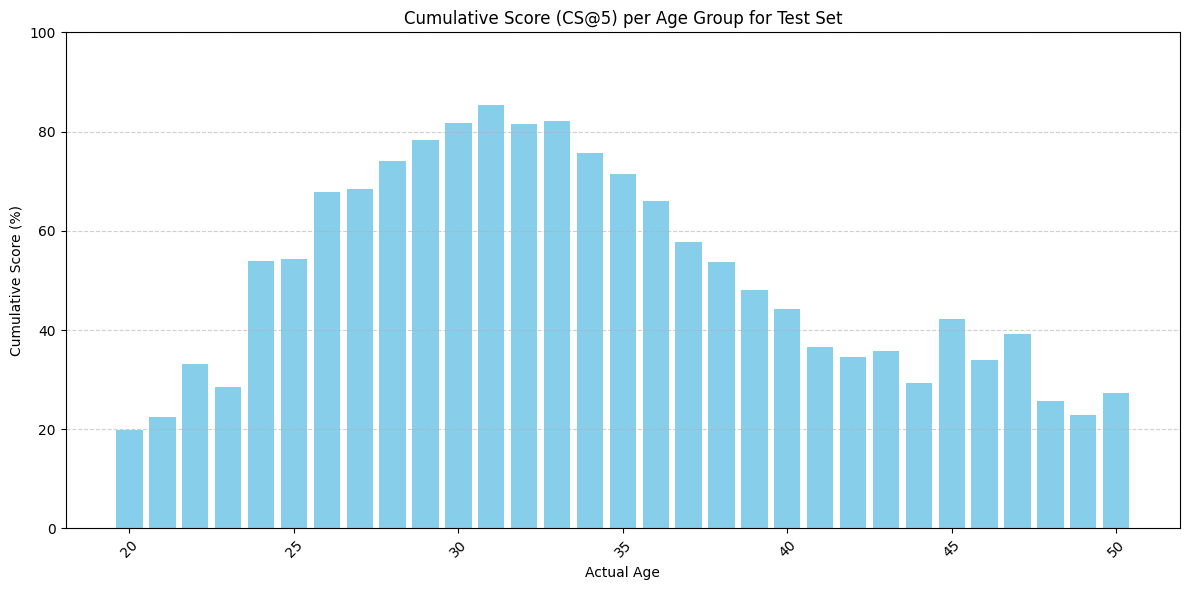

(np.float64(19.88950276243094), np.float64(22.540983606557376), np.float64(33.201581027667984), np.float64(28.57142857142857), np.float64(53.84615384615385), np.float64(54.37499999999999), np.float64(67.88321167883211), np.float64(68.45637583892618), np.float64(74.09638554216868), np.float64(78.39195979899498), np.float64(81.81818181818183), np.float64(85.3211009174312), np.float64(81.62162162162161), np.float64(82.11009174311926), np.float64(75.60975609756098), np.float64(71.50259067357513), np.float64(66.10169491525424), np.float64(57.80346820809249), np.float64(53.714285714285715), np.float64(48.0), np.float64(44.21768707482993), np.float64(36.477987421383645), np.float64(34.48275862068966), np.float64(35.714285714285715), np.float64(29.333333333333332), np.float64(42.30769230769231), np.float64(33.87096774193548), np.float64(39.24050632911392), np.float64(25.64102564102564), np.float64(22.916666666666664), np.float64(27.27272727272727))
<class 'tuple'>


In [57]:
# Lets add one metric to check the performance using Cumulative score with 
# error level 5 for each age.
eval = df_test
eval['error'] = abs(eval['Age'] - eval['DeepFace_SSD_Age'])
ages = sorted(eval['Age'].unique())

cs_by_age =[]
for age in ages:
    subset = eval[eval['Age'] == age]
    total = len(subset) 
    if total == 0:
        continue
    cs = (subset['error'] <= 5).sum() / total if total > 0 else 0
    cs_by_age.append((age, cs*100))
    # print(f"Age: {age}, Cumulative Score (CS) @ error level 5: {cs:.2f}%")

# Split into separate lists for plotting
age_list, cs_list = zip(*cs_by_age)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_list, cs_list, color='skyblue')

plt.title('Cumulative Score (CS@5) per Age Group for Test Set')
plt.xlabel('Actual Age')
plt.ylabel('Cumulative Score (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Evaluation of our trained model in TestSet.
---

In [13]:
import torch
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn
import os
from PIL import Image
import shutil

In [31]:
def inference(model, img):
    model.eval()
    with torch.no_grad():
        outputs = model(img)
        # _, preds = torch.max(outputs, 1)
    return outputs[0]

def load_model(model_path):
    model = models.mobilenet_v2(weights='DEFAULT')
    model = model.to('cpu')
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, 1)
    state_dict = torch.load(model_path, weights_only=True, map_location=torch.device('cpu')) 
    model.load_state_dict(state_dict)
    return model

def preprocess(img_path):
    data_transforms = {
        'eval': transforms.Compose([
            transforms.Resize(224),  # scales the shorter side to maintain aspect ratio
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                [0.229, 0.224, 0.225])
        ]),
    }

    img = Image.open(img_path)
    img = data_transforms['eval'](img)
    img = img.unsqueeze(0)
    img = img.to('cpu')
    return img

In [42]:
model_path = os.path.join(base_path, "models", "age_prediction_0.0.1.pt")
test_set = os.path.join(dataset_path, "test")
test_set_images = []
test_set_ids = []
test_set_ages = []
for root, dirs, files in os.walk(test_set):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            test_set_images.append(os.path.join(root, file))
            test_set_ids.append(file)
            test_set_ages.append(os.path.basename(root))

print(test_set_images[:5])
print(test_set_ids[:5])
print(test_set_ages[:5])

#Load the trained model.
model = load_model(model_path)

# Inference on the test set.
model_results = {'Id':[], 'True_Age':[], 'Predicted_Age':[]}
for img_path, img_id, img_age in zip(test_set_images, test_set_ids, test_set_ages):
    # Preprocess the image according the required model inputs.
    model_input = preprocess(img_path)
    inference_result= inference(model, model_input)
    model_results['Id'].append(img_id)
    model_results['True_Age'].append(int(img_age))
    model_results['Predicted_Age'].append(int(inference_result))
    print(f"Image: {img_id}, True Age: {img_age}, Predicted Age: {int(inference_result)}")


['D://braineye\\dataset\\test\\20\\123283.jpg', 'D://braineye\\dataset\\test\\20\\123401.jpg', 'D://braineye\\dataset\\test\\20\\123568.jpg', 'D://braineye\\dataset\\test\\20\\123799.jpg', 'D://braineye\\dataset\\test\\20\\123952.jpg']
['123283.jpg', '123401.jpg', '123568.jpg', '123799.jpg', '123952.jpg']
['20', '20', '20', '20', '20']
Image: 123283.jpg, True Age: 20, Predicted Age: 30
Image: 123401.jpg, True Age: 20, Predicted Age: 31
Image: 123568.jpg, True Age: 20, Predicted Age: 27
Image: 123799.jpg, True Age: 20, Predicted Age: 27
Image: 123952.jpg, True Age: 20, Predicted Age: 36
Image: 124399.jpg, True Age: 20, Predicted Age: 30
Image: 124671.jpg, True Age: 20, Predicted Age: 34
Image: 124759.jpg, True Age: 20, Predicted Age: 32
Image: 124815.jpg, True Age: 20, Predicted Age: 34
Image: 124956.jpg, True Age: 20, Predicted Age: 32
Image: 125174.jpg, True Age: 20, Predicted Age: 39
Image: 125265.jpg, True Age: 20, Predicted Age: 34
Image: 125972.jpg, True Age: 20, Predicted Age: 32

## Evaluation metrics for our model.
---

In [43]:
version1_df = pd.DataFrame(model_results)
print(version1_df.head(5))

#Metrics
version1_metrics = {}

# Top 1 Accuracy of DeepFace SSD model on our data.
correct_predictions = (version1_df['True_Age'] == version1_df['Predicted_Age']).sum()

total_predictions = version1_df['True_Age'].count()
top_1_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
version1_metrics['Top_1_Accuracy'] = top_1_accuracy
print(f"Top 1 Accuracy of DeepFace Age Prediction model: {top_1_accuracy:.2%}")

# Cumulative Score (CS) at different error levels
for error_level in [5, 10]:
    cs = (abs(version1_df['True_Age'] - version1_df['Predicted_Age']) <= error_level).sum() / total_predictions if total_predictions > 0 else 0
    version1_metrics[f'CS@{error_level}'] = cs
    print(f"Cumulative Score (CS) at error level {error_level}: {cs:.2%}")

# Mean Absolute Error(MAE)
mae = mean_absolute_error(version1_df['True_Age'], version1_df['Predicted_Age'])
version1_metrics['Mean_Absolute_Error'] = mae
print(f"Mean Absolute Error of DeepFace Age Prediction model: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(version1_df['True_Age'], version1_df['Predicted_Age'])
version1_metrics['Mean_Squared_Error'] = mse
print(f"Mean Squared Error of DeepFace Age Prediction model: {mse:.2f}")

           Id  True_Age  Predicted_Age
0  123283.jpg        20             30
1  123401.jpg        20             31
2  123568.jpg        20             27
3  123799.jpg        20             27
4  123952.jpg        20             36
Top 1 Accuracy of DeepFace Age Prediction model: 4.21%
Cumulative Score (CS) at error level 5: 44.03%
Cumulative Score (CS) at error level 10: 75.83%
Mean Absolute Error of DeepFace Age Prediction model: 7.12
Mean Squared Error of DeepFace Age Prediction model: 75.94


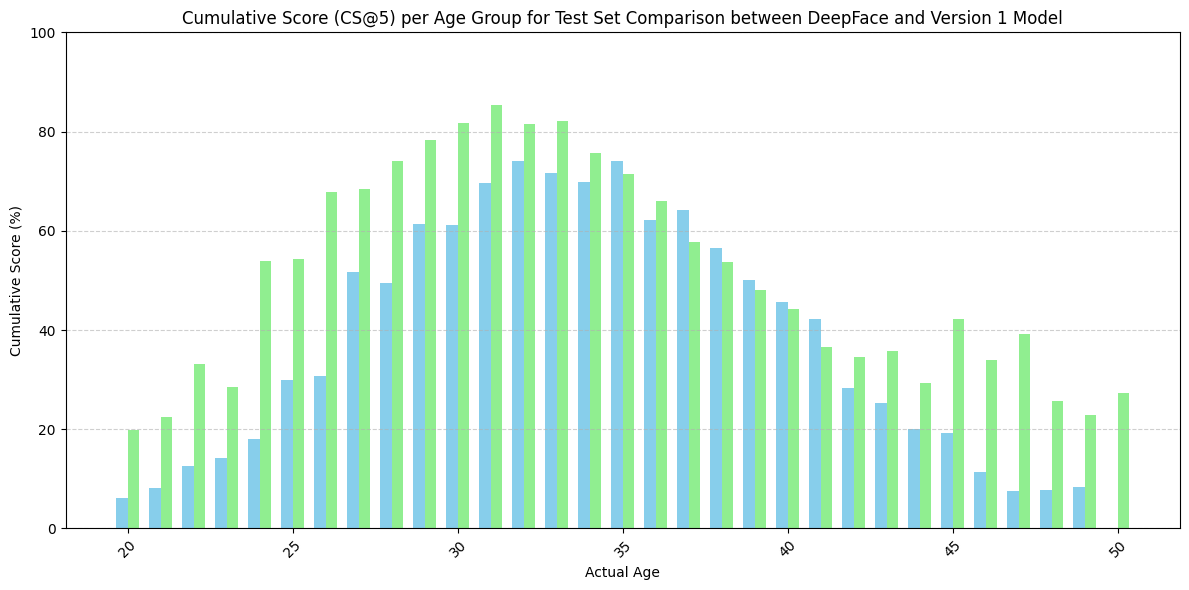

In [63]:
# Lets add one metric to check the performance using Cumulative score with 
# error level 5 for each age.
version1_df['error'] = abs(version1_df['True_Age'] - version1_df['Predicted_Age'])
ages = sorted(version1_df['True_Age'].unique())

v_1_cs_by_age =[]
for age in ages:
    subset = version1_df[version1_df['True_Age'] == age]
    total = len(subset) 
    if total == 0:
        continue
    cs = (subset['error'] <= 5).sum() / total if total > 0 else 0
    v_1_cs_by_age.append((age, cs*100))
    # print(f"Age: {age}, Cumulative Score (CS) @ error level 5: {cs:.2f}%")

# Split into separate lists for plotting
age_list, v_1_cs_list = zip(*v_1_cs_by_age)
age_array = np.array(age_list)

bar_width = 0.35
# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_array - bar_width/2, v_1_cs_list, bar_width, color='skyblue', label='Version 1 Model')
plt.bar(age_array + bar_width/2, cs_list, bar_width, color='lightgreen', label='DeepFace Model')

plt.title('Cumulative Score (CS@5) per Age Group for Test Set Comparison between DeepFace and Version 1 Model')
plt.xlabel('Actual Age')
plt.ylabel('Cumulative Score (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()